In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# 데이터 로드
file_path = '/content/sample_data/다중회귀_복합SCFI_2017.xlsx'
data = pd.read_excel(file_path)

랜덤포레스트 MIN-MAX 스케일링 후 Feature Importance 그래프

- 하이퍼파라미터 최적화 전
- train_rmse = mean_squared_error(y_train, y_train_pred, squared=False) 에러 수정
- squared=False는 최신 버전에서만 지원되는 인자이다.
  현재 환경에서는 직접 np.sqrt(mse)로 RMSE 계산하는 방식이 가장 안전하다.


Train RMSE: 32.32851208537641
Test RMSE: 75.83529120943261


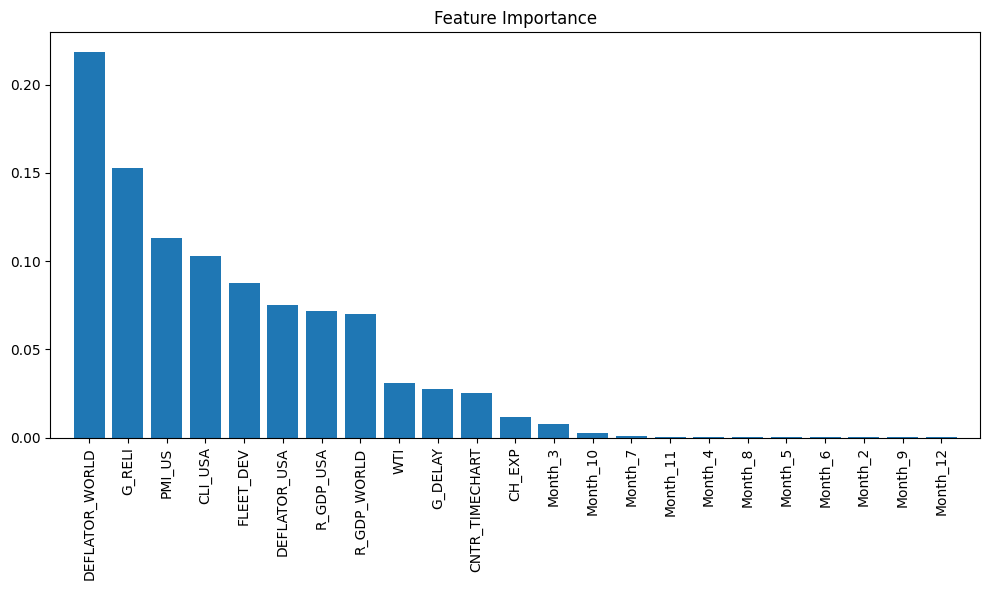

In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 날짜를 'YYYYMM' 형식으로 변환
data['Month'] = pd.to_datetime(data['YYYYMM'], format='%Y-%m').dt.month

# 원-핫 인코딩
month_one_hot = pd.get_dummies(data['Month'], prefix='Month').iloc[:, 1:]

# 독립변수 및 종속변수 설정
independent_vars = ['CH_EXP', 'FLEET_DEV', 'CNTR_TIMECHART', 'WTI', 'R_GDP_WORLD',
                    'DEFLATOR_WORLD', 'R_GDP_USA', 'CLI_USA', 'PMI_US', 'DEFLATOR_USA',
                    'G_RELI', 'G_DELAY']
X = data[independent_vars]
y = data['SCFI_C']

# 원-핫 인코딩된 월 정보 추가
X = pd.concat([X, month_one_hot], axis=1)

# Min-Max 스케일링
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=6, shuffle=False)

# 랜덤 포레스트 모델 학습
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# 예측 및 평가
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# ⛔️ 오류 방지를 위한 RMSE 계산 방식 수정
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

# Feature Importance 시각화
feature_importances = rf.feature_importances_
features = X.columns

# 정렬된 feature importances
indices = np.argsort(feature_importances)[::-1]
sorted_features = [features[i] for i in indices]
sorted_importances = feature_importances[indices]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), sorted_importances, align="center")
plt.xticks(range(X.shape[1]), sorted_features, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()


# 도표 20-17. 랜덤 포레스트 Min-Max 스케일링 적용 및 특성 중요도

랜덤포레스트 MIN-MAX 스케일링 후 Feature Importance 그래프

하이퍼파라미터 최적화

 7분 30초 소요

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
648 fits failed out of a total of 1944.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
436 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

Train RMSE: 28.26931775036807
Test RMSE: 71.39168913558713


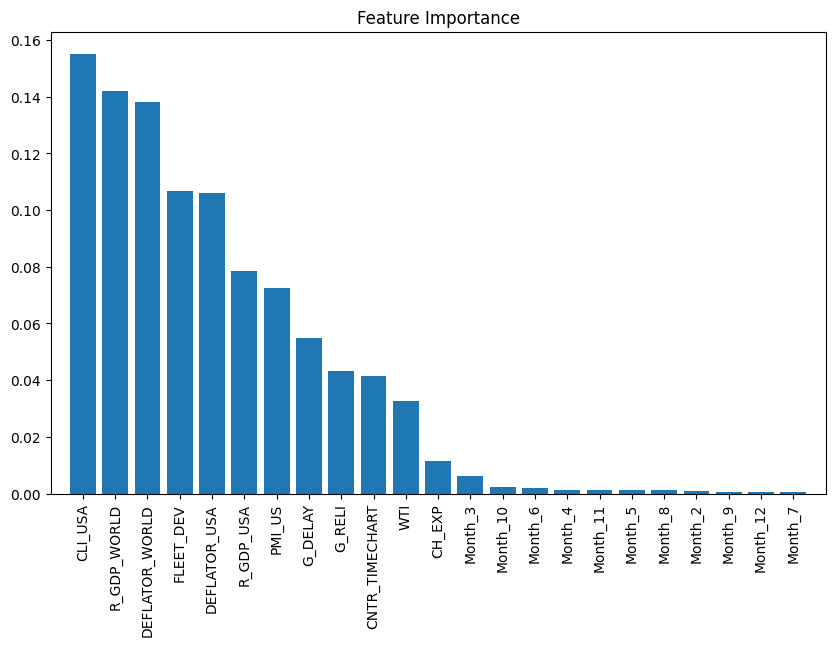

In [8]:

# 날짜를 'YYYYMM' 형식으로 변환
data['Month'] = pd.to_datetime(data['YYYYMM'], format='%Y-%m').dt.month

# 원-핫 인코딩
month_one_hot = pd.get_dummies(data['Month'], prefix='Month').iloc[:, 1:]

# 독립변수 및 종속변수 설정
independent_vars = ['CH_EXP', 'FLEET_DEV', 'CNTR_TIMECHART', 'WTI', 'R_GDP_WORLD',
                    'DEFLATOR_WORLD', 'R_GDP_USA', 'CLI_USA', 'PMI_US', 'DEFLATOR_USA',
                    'G_RELI', 'G_DELAY']
X = data[independent_vars]
y = data['SCFI_C']

# 원-핫 인코딩된 월 정보 추가
X = pd.concat([X, month_one_hot], axis=1)

# Min-Max 스케일링
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=6, shuffle=False)

# 랜덤 포레스트 모델 하이퍼파라미터 최적화
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid,
                           cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 최적의 모델 선택
best_rf = grid_search.best_estimator_

# 최적의 모델로 예측 및 평가
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)


# ⛔️ 오류 방지를 위한 RMSE 계산 방식 수정
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))


print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

# Feature Importance 시각화
feature_importances = best_rf.feature_importances_
features = X.columns

# 정렬된 feature importances
indices = np.argsort(feature_importances)[::-1]
sorted_features = [features[i] for i in indices]
sorted_importances = feature_importances[indices]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), sorted_importances, align="center")
plt.xticks(range(X.shape[1]), sorted_features, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


# 도표 20-18. GBM과XGBoost의 Min-Max 스케일링 적용 및 특성 중요도

GBM과 XGBoost Min-Max 스케일링과 Feature 중요도

하이퍼파라미터 최적화

두개 모형 : 1분 41초 소요

GBM Train RMSE: 1.6885657204648814
GBM Test RMSE: 67.96957272676636
XGBoost Train RMSE: 1.5254135361390861
XGBoost Test RMSE: 64.68345000919943


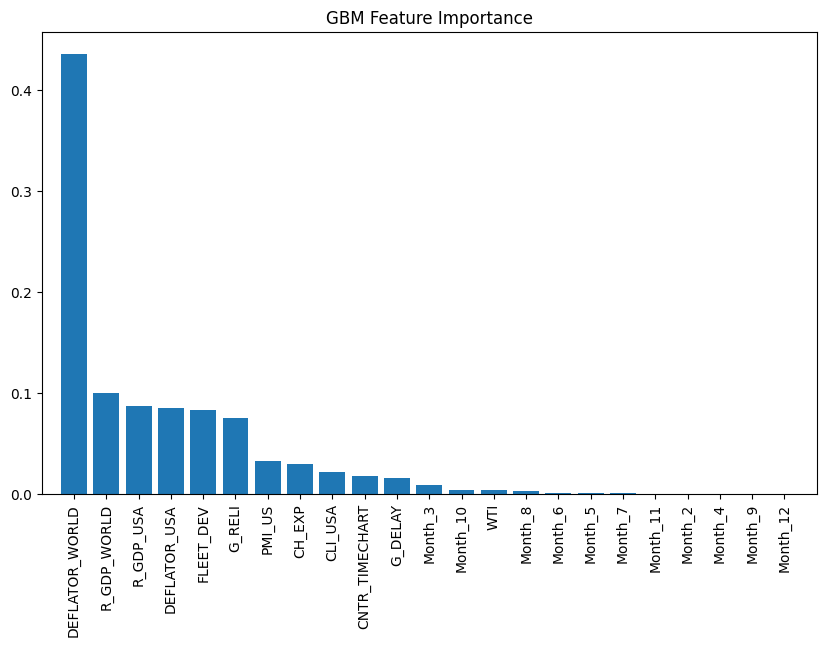

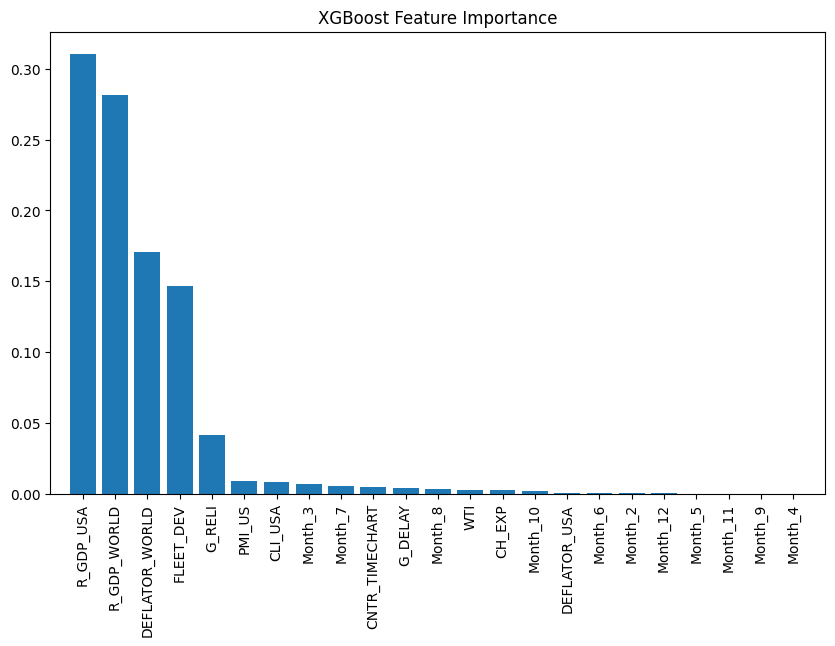

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np


# 날짜를 'YYYYMM' 형식으로 변환
data['Month'] = pd.to_datetime(data['YYYYMM'], format='%Y-%m').dt.month

# 원-핫 인코딩
month_one_hot = pd.get_dummies(data['Month'], prefix='Month').iloc[:, 1:]

# 독립변수 및 종속변수 설정
independent_vars = ['CH_EXP', 'FLEET_DEV', 'CNTR_TIMECHART', 'WTI', 'R_GDP_WORLD',
                    'DEFLATOR_WORLD', 'R_GDP_USA', 'CLI_USA', 'PMI_US', 'DEFLATOR_USA',
                    'G_RELI', 'G_DELAY']
X = data[independent_vars]
y = data['SCFI_C']

# 원-핫 인코딩된 월 정보 추가
X = pd.concat([X, month_one_hot], axis=1)

# Min-Max 스케일링
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=6, shuffle=False)

# Gradient Boosting Regressor 하이퍼파라미터 최적화
gbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gbm_grid_search = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=gbm_param_grid,
                               cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
gbm_grid_search.fit(X_train, y_train)

# 최적의 GBM 모델 선택
best_gbm = gbm_grid_search.best_estimator_

# 최적의 GBM 모델로 예측 및 평가
y_train_pred_gbm = best_gbm.predict(X_train)
y_test_pred_gbm = best_gbm.predict(X_test)

# train_rmse_gbm = mean_squared_error(y_train, y_train_pred_gbm, squared=False)
# test_rmse_gbm = mean_squared_error(y_test, y_test_pred_gbm, squared=False)

# ⛔️ 오류 방지를 위한 RMSE 계산 방식 수정
# squared=False 사용 불가 환경 대응 → 직접 RMSE 계산
train_rmse_gbm = np.sqrt(mean_squared_error(y_train, y_train_pred_gbm))
test_rmse_gbm = np.sqrt(mean_squared_error(y_test, y_test_pred_gbm))

print(f'GBM Train RMSE: {train_rmse_gbm}')
print(f'GBM Test RMSE: {test_rmse_gbm}')

# XGBoost Regressor 하이퍼파라미터 최적화
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_grid_search = GridSearchCV(estimator=XGBRegressor(), param_grid=xgb_param_grid,
                               cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
xgb_grid_search.fit(X_train, y_train)

# 최적의 XGBoost 모델 선택
best_xgb = xgb_grid_search.best_estimator_

# 최적의 XGBoost 모델로 예측 및 평가
y_train_pred_xgb = best_xgb.predict(X_train)
y_test_pred_xgb = best_xgb.predict(X_test)

# train_rmse_xgb = mean_squared_error(y_train, y_train_pred_xgb, squared=False)
# test_rmse_xgb = mean_squared_error(y_test, y_test_pred_xgb, squared=False)

# squared=False 사용 대신 sqrt로 RMSE 계산
train_rmse_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))

print(f'XGBoost Train RMSE: {train_rmse_xgb}')
print(f'XGBoost Test RMSE: {test_rmse_xgb}')

# Feature Importance 시각화 (GBM)
gbm_feature_importances = best_gbm.feature_importances_
gbm_indices = np.argsort(gbm_feature_importances)[::-1]
gbm_sorted_features = [X.columns[i] for i in gbm_indices]
gbm_sorted_importances = gbm_feature_importances[gbm_indices]

plt.figure(figsize=(10, 6))
plt.title("GBM Feature Importance")
plt.bar(range(X.shape[1]), gbm_sorted_importances, align="center")
plt.xticks(range(X.shape[1]), gbm_sorted_features, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Feature Importance 시각화 (XGBoost)
xgb_feature_importances = best_xgb.feature_importances_
xgb_indices = np.argsort(xgb_feature_importances)[::-1]
xgb_sorted_features = [X.columns[i] for i in xgb_indices]
xgb_sorted_importances = xgb_feature_importances[xgb_indices]

plt.figure(figsize=(10, 6))
plt.title("XGBoost Feature Importance")
plt.bar(range(X.shape[1]), xgb_sorted_importances, align="center")
plt.xticks(range(X.shape[1]), xgb_sorted_features, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


랜덤포레스트 MIN-MAX 스케일링을 하지 않고, 원래 변수 기준  Feature Importance 그래프

하이퍼파라미터 최적화

7부 26초 소요

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
648 fits failed out of a total of 1944.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
303 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

Train RMSE: 28.25235573233781
Test RMSE: 73.42068784678804


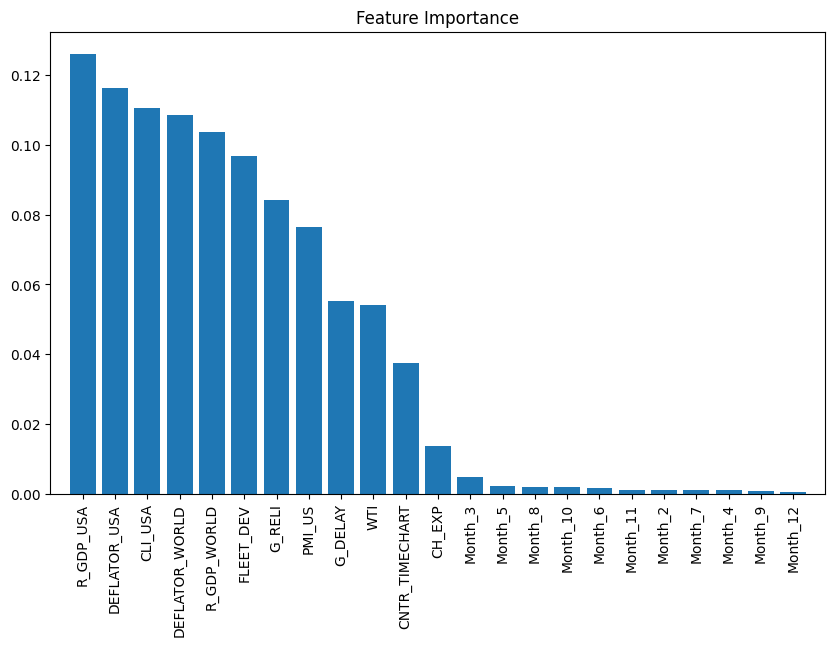

In [10]:
# 날짜를 'YYYYMM' 형식으로 변환
data['Month'] = pd.to_datetime(data['YYYYMM'], format='%Y-%m').dt.month

# 원-핫 인코딩
month_one_hot = pd.get_dummies(data['Month'], prefix='Month').iloc[:, 1:]

# 독립변수 및 종속변수 설정
independent_vars = ['CH_EXP', 'FLEET_DEV', 'CNTR_TIMECHART', 'WTI', 'R_GDP_WORLD',
                    'DEFLATOR_WORLD', 'R_GDP_USA', 'CLI_USA', 'PMI_US', 'DEFLATOR_USA',
                    'G_RELI', 'G_DELAY']
X = data[independent_vars]
y = data['SCFI_C']

# 원-핫 인코딩된 월 정보 추가
X = pd.concat([X, month_one_hot], axis=1)

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=6, shuffle=False)

# 랜덤 포레스트 모델 하이퍼파라미터 최적화
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid,
                           cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 최적의 모델 선택
best_rf = grid_search.best_estimator_

# 최적의 모델로 예측 및 평가
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
# test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

# squared=False 사용 대신 sqrt로 RMSE 계산
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

# Feature Importance 시각화
feature_importances = best_rf.feature_importances_
features = X.columns

# 정렬된 feature importances
indices = np.argsort(feature_importances)[::-1]
sorted_features = [features[i] for i in indices]
sorted_importances = feature_importances[indices]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), sorted_importances, align="center")
plt.xticks(range(X.shape[1]), sorted_features, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
